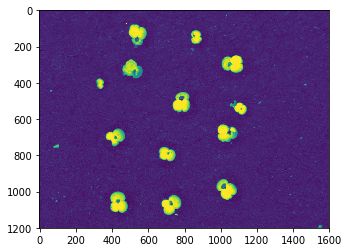

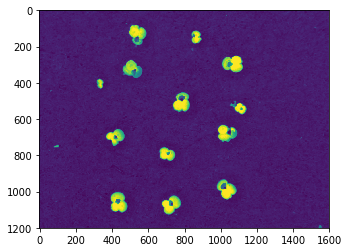

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../img/G.ruber-um-1.tif',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

plt.imshow(img)
plt.show()
img2 = plt.imshow(erosion)
plt.show()
#notice the removal of noise in the second image

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

In [5]:
M = np.zeros((7,7), dtype=np.uint8)
M[3,3] = 1
k1 = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
M1 = cv.dilate(M, k1, iterations=2)
print(M1)
M1 = cv.erode(M, k1 ,iterations=1)
print(M1)
#in the above, think about the sequential nature of how it goes through the array

k2 = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
M2 = cv.dilate(M, k2, iterations=1)
print(M2)

k1 = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
M1 = cv.dilate(M, k1, iterations=2)

[[0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]]


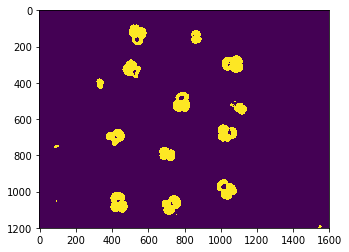

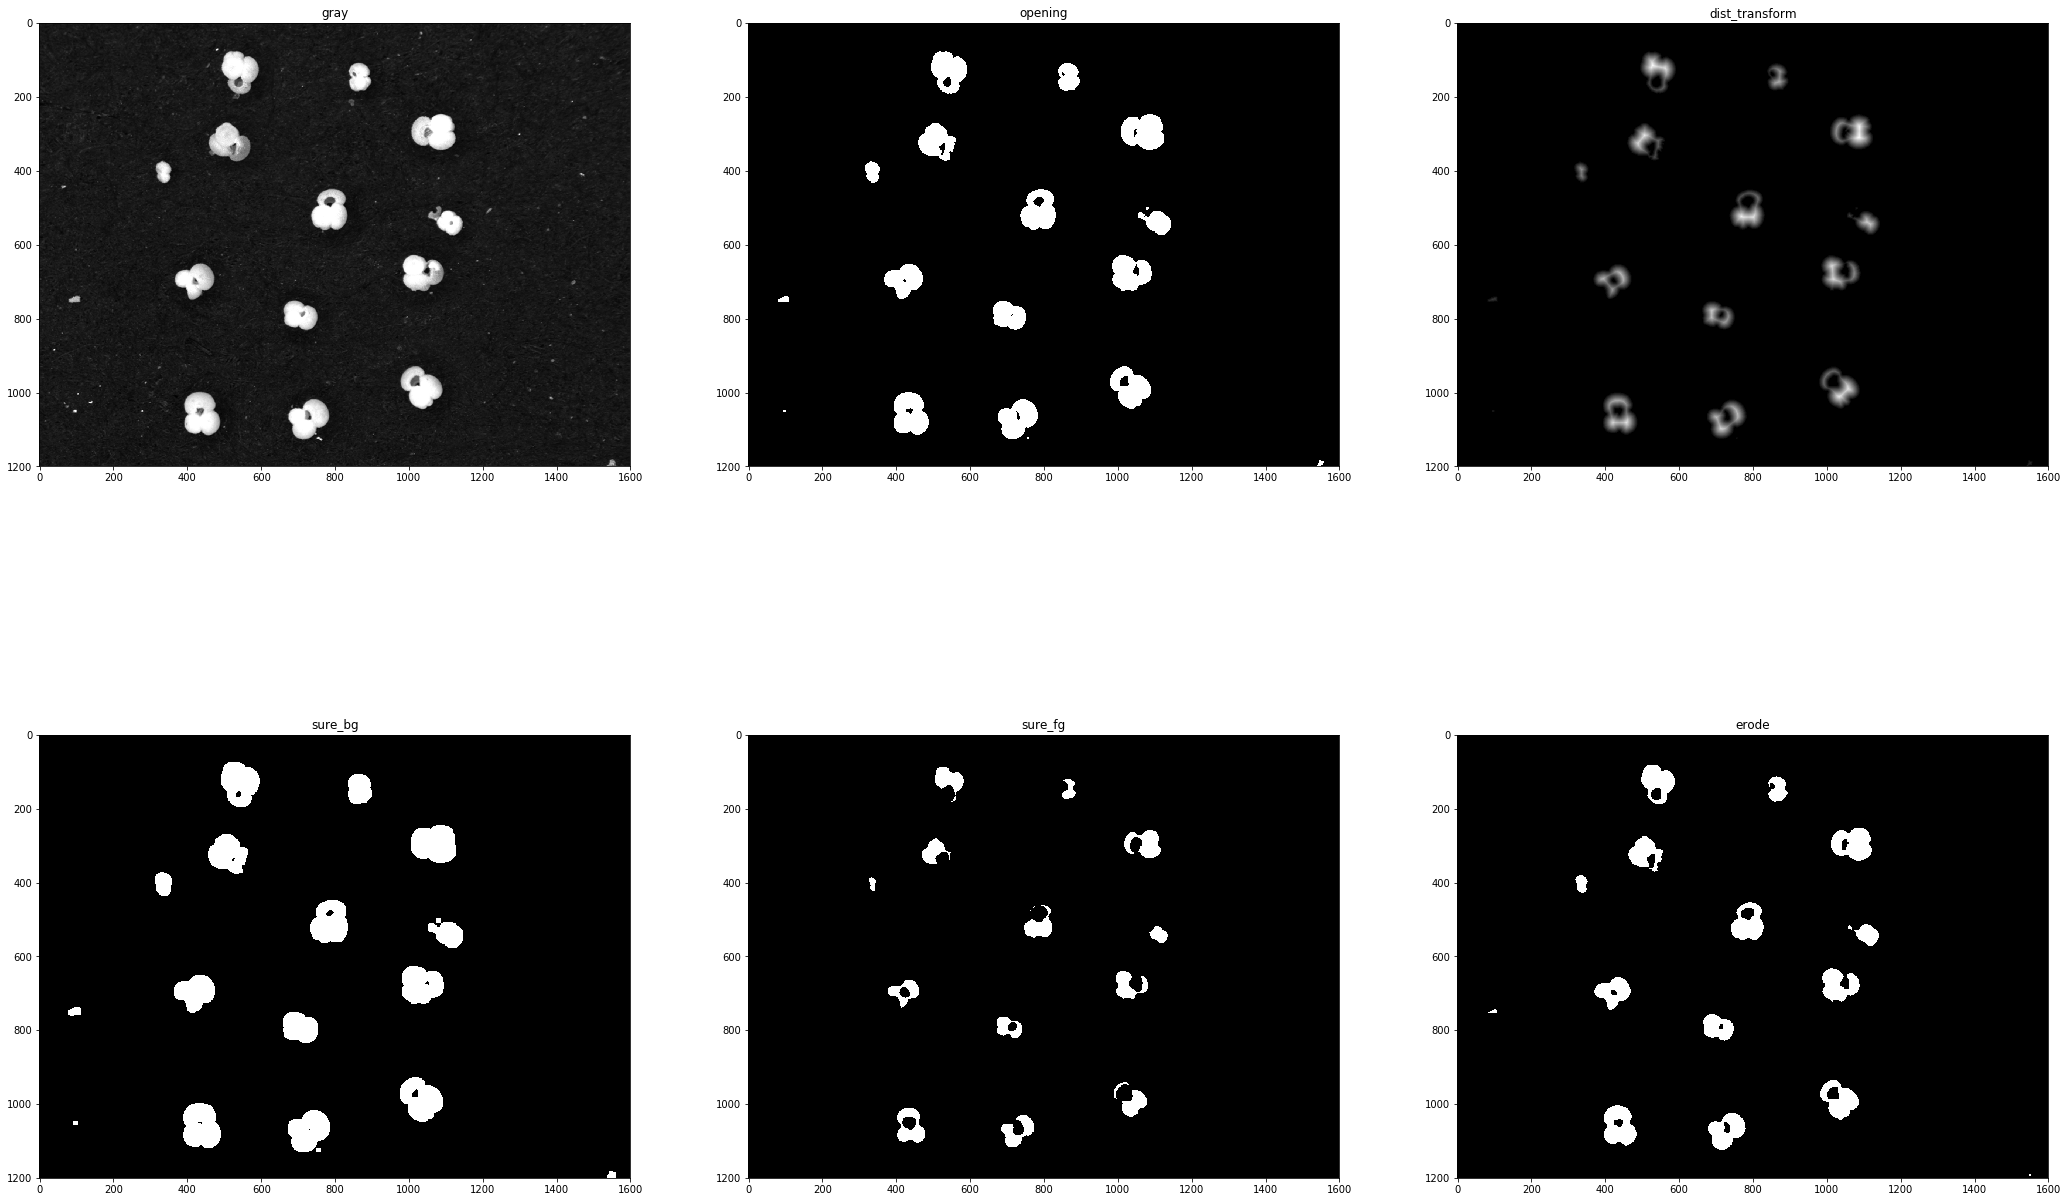

In [6]:
img = cv.imread('../img/G.ruber-um-1.tif')

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening)
plt.show()
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3) #black region shows sure background
another_fg = cv.erode(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.3*dist_transform.max(),255,0)
# the threshold allows us to consider the regions most distant to the background
# doing so allows us to use them as markers
# Finding unknown region
sure_fg = np.uint8(sure_fg) #white region shows sure foreground
unknown = cv.subtract(sure_bg,sure_fg)

titles =  ["gray","opening", "dist_transform", "sure_bg", "sure_fg", 'erode']
show_images([gray,opening, dist_transform, sure_bg, sure_fg, another_fg], 2, titles)

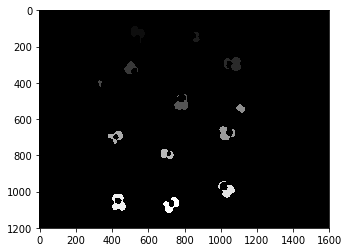

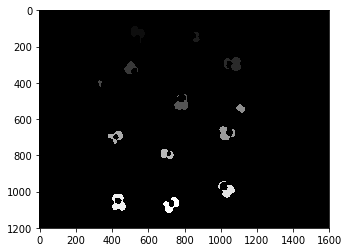

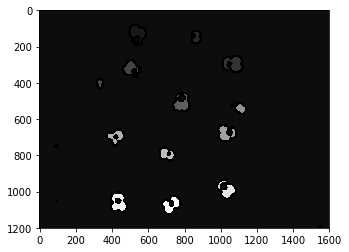

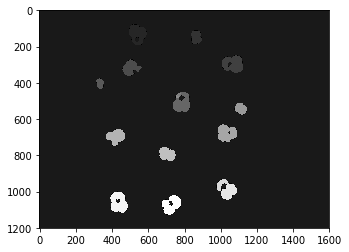

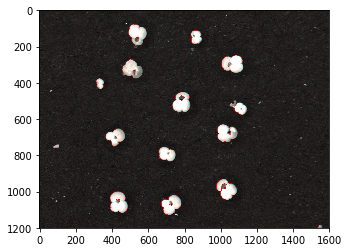

In [7]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
plt.imshow(markers)
plt.show()
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
plt.imshow(markers)
plt.show()
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
# im_color = cv.applyColorMap(markers, cv.COLORMAP_JET)
# plt.imshow(im_color)
# pt.show()
plt.imshow(markers)
plt.show()
markers = cv.watershed(img,markers)
plt.imshow(markers)
plt.show()
img[markers == -1] = [255,0,0]
plt.imshow(img)
plt.show()
titles = ["marker", "marker+1", "unknown is black", "watershed", "create border"]


(1200, 1600)


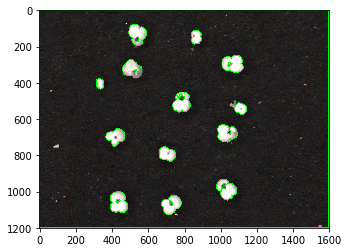

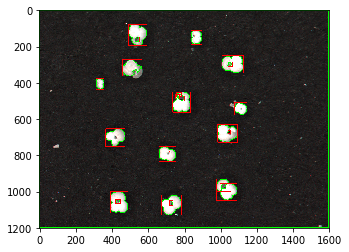

In [13]:
img = cv.imread('../img/G.ruber-um-1.tif')
print(markers.shape)
ret, thresh = cv.threshold(markers, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(img)
plt.show()
for i in range(len(contours)):
    x,y,w,h = cv.boundingRect(contours[i])
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(img)
plt.show()

(1200, 1600)


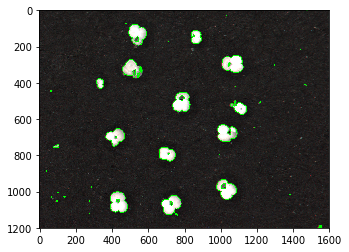

In [10]:
# Contours can be explained simply as a curve joining all the continuous points 
# (along the boundary), having same color or intensity.
# This is why you see green lines drawn around the boundaryw
im = cv.imread('../img/G.ruber-um-1.tif')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(img)
plt.show()